## Data Preprocessing ##

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

from sklearn import tree
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import torch
from torch.utils.data import DataLoader, TensorDataset

In [2]:
data = pd.read_csv("mushrooms.csv")
data.head(6)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [3]:
# Check for missing values
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
print(data.describe())

       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top    

In [4]:
labelencoder=LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])

data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [5]:
X = data.drop('class', axis=1)  # Features
y = data['class']               # Target variable

# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Training set - Features:", X_train.shape)
print("Testing set - Features:", X_test.shape)

Training set - Features: (6499, 22)
Testing set - Features: (1625, 22)


## Logistic Regression ##

In [ ]:
# Initialize and fit logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predicitions
y_pred = log_reg.predict(X_test)

# Calculate and print performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Logistic Regression - Accuracy: {accuracy:.4f}")
print(f"Logistic Regression - Precision: {precision:.4f}")
print(f"Logistic Regression - Recall: {recall:.4f}")
print(f"Logistic Regression - F1 Score: {f1:.4f}")

Logistic Regression - Accuracy: 0.9477
Logistic Regression - Precision: 0.9592
Logistic Regression - Recall: 0.9342
Logistic Regression - F1 Score: 0.9465


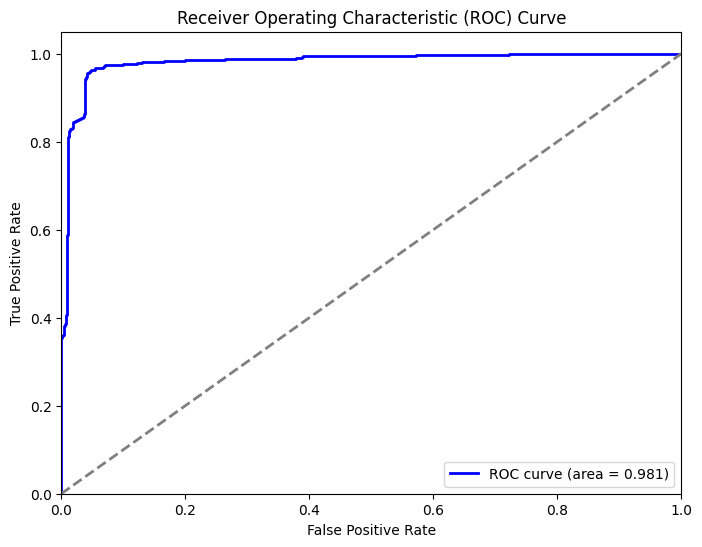

In [ ]:
# Added ROC of base models
# Calculate the probability scores for the positive class
y_score = log_reg.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Define param space
param_grid = [
    {'solver':['liblinear'], 'penalty':['l1', 'l2'], 'C': np.logspace(-4, 5, 20)},
    {'solver':['lbfgs'], 'penalty':['l2'], 'C': np.logspace(-4, 5, 20)},
    {'solver':['saga'], 'penalty':['l1', 'l2'], 'C': np.logspace(-4, 5, 20)},
]

# Grid search and cross-validation
log_reg = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(log_reg, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'C': 3792.690190732246, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score: 0.9613771540238053


In [ ]:
# Make predictions
y_pred = best_model.predict(X_test)

# Calculate and print performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Logistic Regression (Best Model) - Accuracy: {accuracy:.4f}")
print(f"Logistic Regression (Best Model) - Precision: {precision:.4f}")
print(f"Logistic Regression (Best Model) - Recall: {recall:.4f}")
print(f"Logistic Regression (Best Model) - F1 Score: {f1:.4f}")

Logistic Regression (Best Model) - Accuracy: 0.9649
Logistic Regression (Best Model) - Precision: 0.9722
Logistic Regression (Best Model) - Recall: 0.9565
Logistic Regression (Best Model) - F1 Score: 0.9643


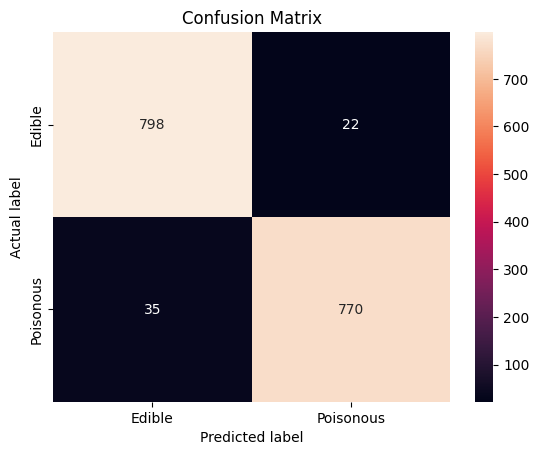

In [ ]:
# Plot confusion matrix
class_names = ['Edible', 'Poisonous']
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, cmap="Blues", annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       820
           1       0.97      0.96      0.96       805

    accuracy                           0.96      1625
   macro avg       0.97      0.96      0.96      1625
weighted avg       0.97      0.96      0.96      1625



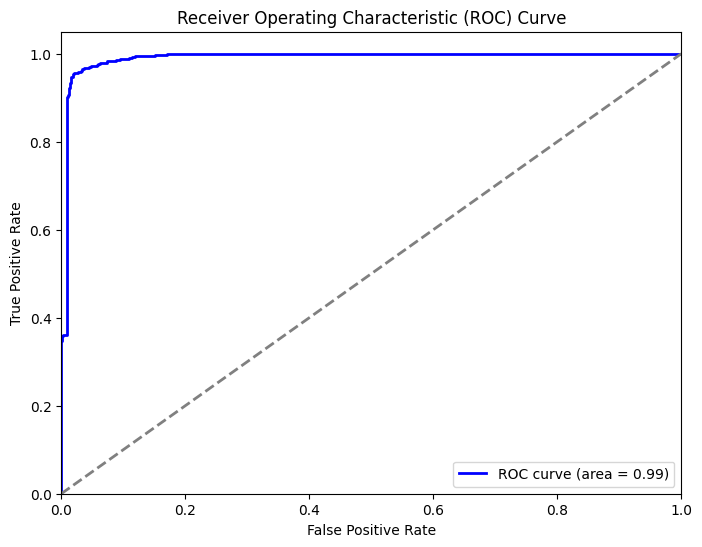

In [ ]:
# Calculate the probability scores for the positive class
y_score = best_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## SVM ##

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')


Accuracy: 0.9852307692307692
Precision: 0.9987228607918263
Recall: 0.9714285714285714
F1 Score: 0.9848866498740554


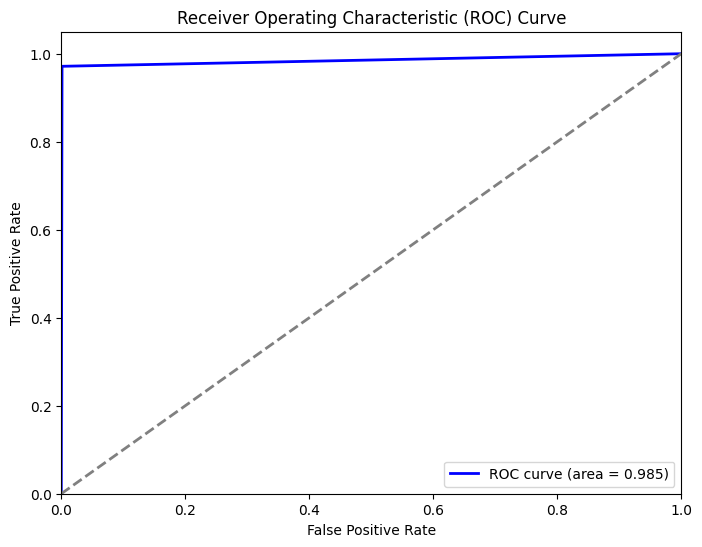

In [ ]:
# Added ROC of base models
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
param_grid = {'C': [1, 10, 100, 1000], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.2, 0.4]},

In [ ]:
svm = SVC()
grid_search = GridSearchCV(svm, param_grid=param_grid, cv=4)
grid_search.fit(X_train, y_train)
print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
best_score = grid_search.best_score_
print("Best score found:", grid_search.best_score_)

Best score found: 0.9998461538461538


In [ ]:
best_svm_model = grid_search.best_estimator_
y_pred_test = best_svm_model.predict(X_test)
test_accuracy_best_model = accuracy_score(y_test, y_pred_test)
print("Test Accuracy of the Best Model:", test_accuracy_best_model)

Test Accuracy of the Best Model: 1.0


[[820   0]
 [  0 805]]


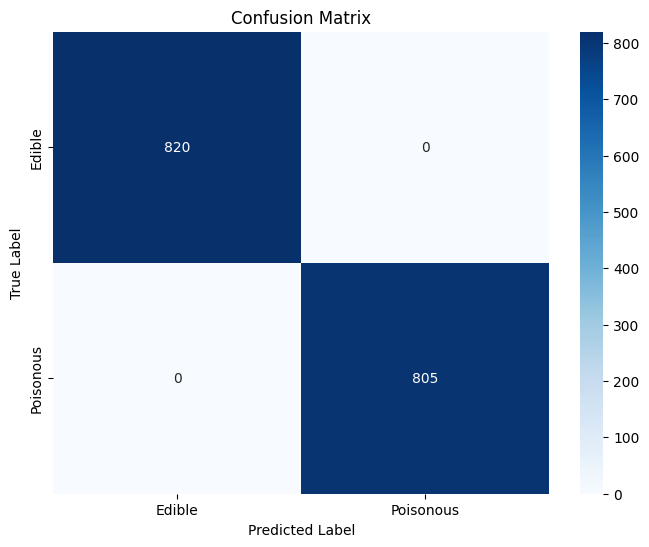

In [ ]:
class_names = ['Edible', 'Poisonous']
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



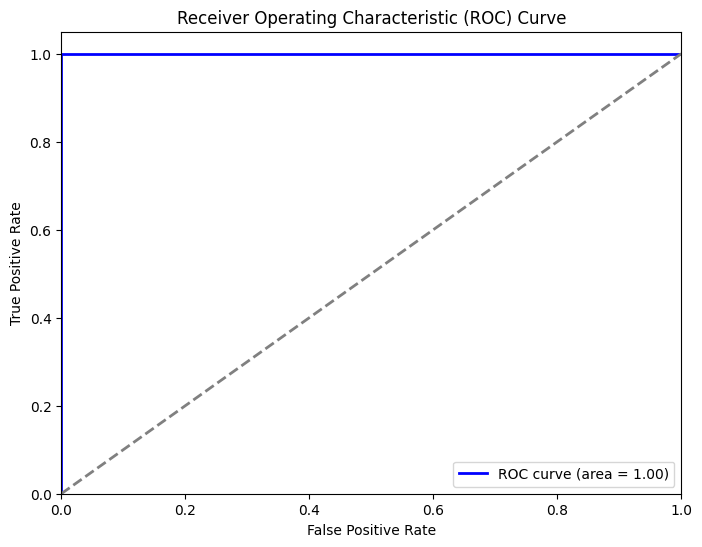

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Decision Tree ##

In [ ]:
# Initialize the decision tree classifier
dt_model = tree.DecisionTreeClassifier(random_state=1, max_depth = 5)

# Train the classifier on the training data
dt_model.fit(X_train, y_train)
train_accuracy = dt_model.score(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9790737036467149
Testing Accuracy: 0.9803076923076923


In [ ]:
# Calculate and print performance metrics (added)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9852
Precision: 0.9987
Recall: 0.9714
F1 Score: 0.9849


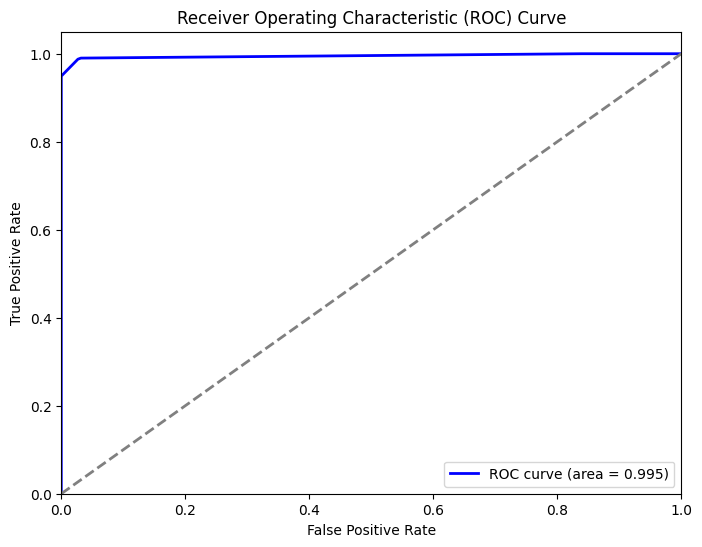

In [ ]:
# Calculate the probability scores for the positive class
y_score = dt_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Hyperparameter Tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2,3,4,5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_dt_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 1.0


In [ ]:
# Make predictions on the test data
y_pred_test = best_dt_model.predict(X_test)

# Calculate the accuracy of the best model on the test data
test_accuracy_best_model = accuracy_score(y_test, y_pred_test)

# Print the test accuracy of the best model
print("Test Accuracy of the Best Model:", test_accuracy_best_model)


Test Accuracy of the Best Model: 1.0


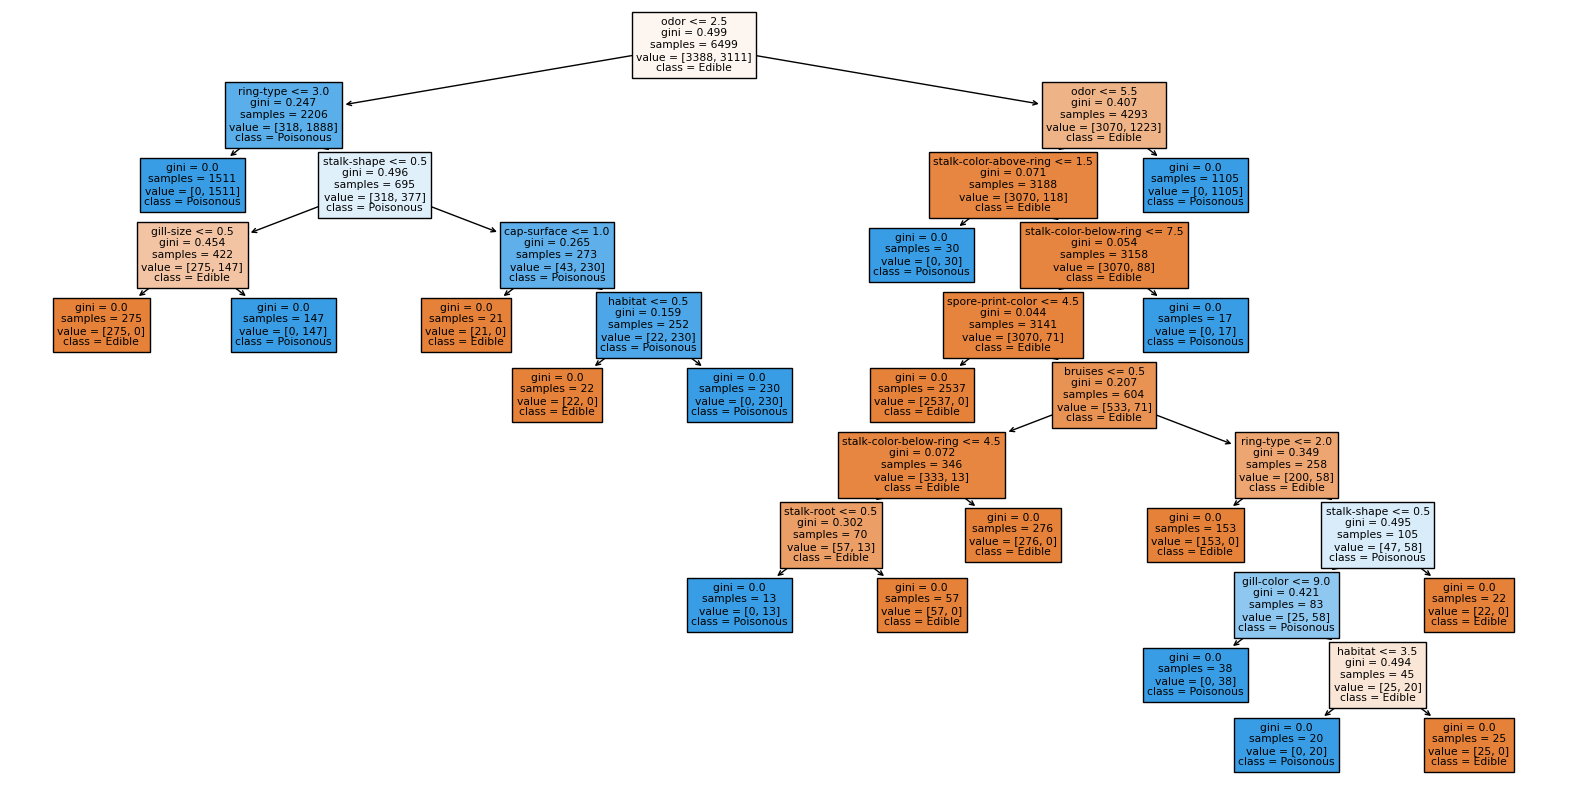

In [ ]:
# Visualize the tree
class_names = ['Edible', 'Poisonous']
plt.figure(figsize=(20,10))
tree.plot_tree(best_dt_model, feature_names=X.columns, class_names=class_names, filled=True)

plt.show()

[[820   0]
 [  0 805]]


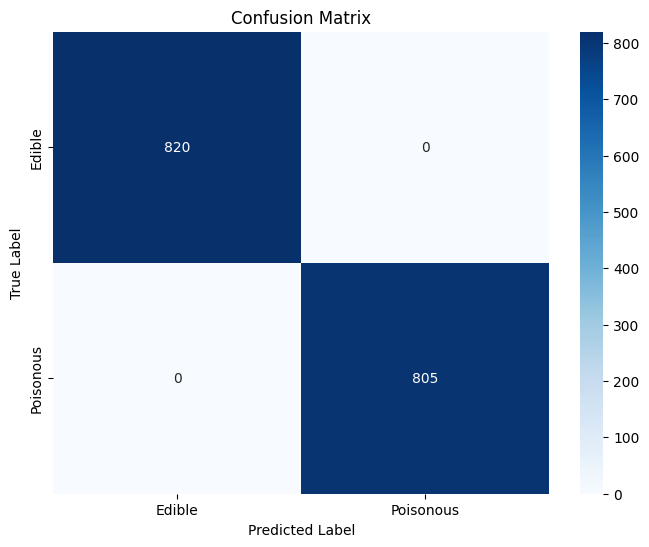

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
# Calculate precision
precision = precision_score(y_test, y_pred_test, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred_test, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, y_pred_test, average='weighted')

# Print the precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 1.0
Recall: 1.0
F1-score: 1.0


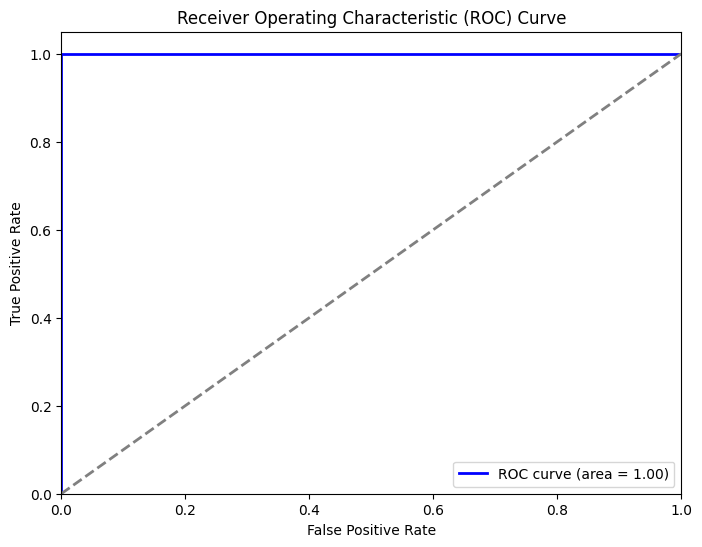

In [ ]:
# Calculate the probability scores for the positive class
y_score = best_dt_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Neural Network ##

In [6]:
X = data.drop('class', axis=1)  # Features
y = data['class']               # Target variable

# Split the data into 60% training, 20% validation and 20% testing sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.4, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=1)
print("Training set - Features:", X_train.shape)
print("Validation set - Features:", X_val.shape)
print("Testing set - Features:", X_test.shape)

Training set - Features: (4874, 22)
Validation set - Features: (1625, 22)
Testing set - Features: (1625, 22)


In [7]:
# Convert numpy arrays to PyTorch tensors
X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
X_val = torch.tensor(X_val.values, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

# Create TensorDatasets
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

# Create DataLoaders
batch_size = 256
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [8]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = torch.nn.Linear(22, 64)
        self.fc2 = torch.nn.Linear(64, 32)
        self.fc3 = torch.nn.Linear(32, 1)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [22]:
def train_model(model, train_loader, val_loader, optimizer, epochs=20):
    criterion = torch.nn.BCEWithLogitsLoss()
    best_val_acc = 0
    best_epoch = 0
    best_val_labels = []
    best_val_preds = []
    best_val_probs = []

    for epoch in range(epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        train_preds, train_labels = [], []
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            predicted = torch.sigmoid(outputs) > 0.5
            train_preds.extend(predicted.cpu().numpy())
            train_labels.extend(labels.cpu().numpy())

        # Calculate training metrics
        train_acc = accuracy_score(train_labels, train_preds)
        train_f1 = f1_score(train_labels, train_preds)
        train_precision = precision_score(train_labels, train_preds)
        train_recall = recall_score(train_labels, train_preds)

        # Validation phase
        model.eval()
        val_preds, val_labels, val_probs = [], [], []
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs).squeeze()
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                probs = torch.sigmoid(outputs).cpu().numpy()
                predicted = probs > 0.5
                val_preds.extend(predicted)
                val_probs.extend(probs)
                val_labels.extend(labels.cpu().numpy())

        # Calculate validation metrics
        val_acc = accuracy_score(val_labels, val_preds)
        val_f1 = f1_score(val_labels, val_preds)
        val_precision = precision_score(val_labels, val_preds)
        val_recall = recall_score(val_labels, val_preds)

        # Update best validation accuracy, and save preds, labels, probs
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_epoch = epoch
            best_val_labels = val_labels
            best_val_preds = val_preds
            best_val_probs = val_probs

        # Print metrics
        print(f'Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss/len(val_loader):.4f}, Val Acc: {val_acc:.4f}')
        print(f'Train F1: {train_f1:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}')
        print(f'Val F1: {val_f1:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}')

    # After all epochs, plot for the best epoch
    if best_epoch >= 0:
        # Plot confusion matrix
        cm = confusion_matrix(best_val_labels, best_val_preds)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
        plt.title(f'Confusion Matrix - Validation Set (Best Epoch: {best_epoch+1})')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.show()

        # Plot AUC-ROC curve
        fpr, tpr, _ = roc_curve(best_val_labels, best_val_probs)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic - Validation Set (Best Epoch: {best_epoch+1})')
        plt.legend(loc="lower right")
        plt.show()

    # Return the trained model and metrics
    return train_acc, best_val_acc, model

In [23]:
def test_model(model, test_loader):
    model.eval()
    test_preds, test_labels = [], []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs).squeeze()
            predicted = torch.sigmoid(outputs) > 0.5
            test_preds.extend(predicted.numpy())
            test_labels.extend(labels.numpy())

    # Calculate test metrics
    test_acc = accuracy_score(test_labels, test_preds)
    test_f1 = f1_score(test_labels, test_preds)
    test_precision = precision_score(test_labels, test_preds)
    test_recall = recall_score(test_labels, test_preds)

    print(f'Testing Metrics: Accuracy: {test_acc:.4f}, F1: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}')

    # Plot confusion matrix for the test set
    cm = confusion_matrix(test_labels, test_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
    plt.title('Confusion Matrix - Test Set')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

Epoch 1, Loss: 0.7640, Train Acc: 0.7735, Val Loss: 0.4081, Val Acc: 0.8215
Train F1: 0.7481, Precision: 0.8011, Recall: 0.7016
Val F1: 0.7748, Precision: 0.9862, Recall: 0.6381
Epoch 2, Loss: 0.2604, Train Acc: 0.9046, Val Loss: 0.2329, Val Acc: 0.9335
Train F1: 0.8980, Precision: 0.9208, Recall: 0.8763
Val F1: 0.9329, Precision: 0.9070, Recall: 0.9604
Epoch 3, Loss: 0.2080, Train Acc: 0.9372, Val Loss: 0.1515, Val Acc: 0.9532
Train F1: 0.9343, Precision: 0.9375, Recall: 0.9311
Val F1: 0.9512, Precision: 0.9561, Recall: 0.9463
Epoch 4, Loss: 0.1569, Train Acc: 0.9462, Val Loss: 0.1661, Val Acc: 0.9465
Train F1: 0.9436, Precision: 0.9493, Recall: 0.9379
Val F1: 0.9455, Precision: 0.9264, Recall: 0.9655
Epoch 5, Loss: 0.1595, Train Acc: 0.9446, Val Loss: 0.1517, Val Acc: 0.9465
Train F1: 0.9420, Precision: 0.9453, Recall: 0.9388
Val F1: 0.9435, Precision: 0.9578, Recall: 0.9297
Epoch 6, Loss: 0.1390, Train Acc: 0.9491, Val Loss: 0.1476, Val Acc: 0.9563
Train F1: 0.9469, Precision: 0.946

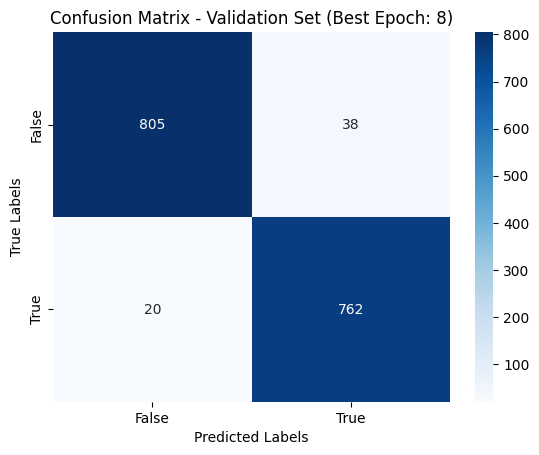

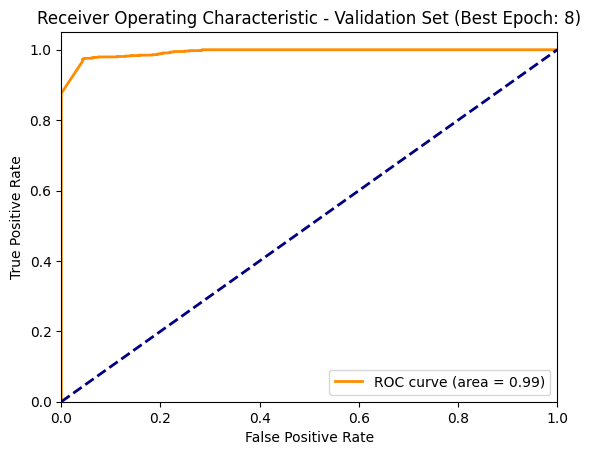

Testing Metrics: Accuracy: 0.9618, F1: 0.9615, Precision: 0.9532, Recall: 0.9699


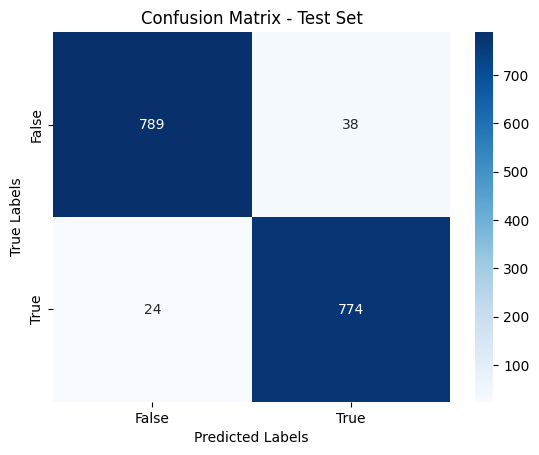

In [24]:
model = NeuralNetwork()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
train_acc, val_acc, trained_model = train_model(model, train_loader, val_loader, optimizer)
test_accuracy = test_model(trained_model, test_loader)

Epoch 1, Loss: 0.3239, Train Acc: 0.8580, Val Loss: 0.1852, Val Acc: 0.9458
Train F1: 0.8421, Precision: 0.9018, Recall: 0.7898
Val F1: 0.9440, Precision: 0.9392, Recall: 0.9488
Epoch 2, Loss: 0.1260, Train Acc: 0.9510, Val Loss: 0.0958, Val Acc: 0.9686
Train F1: 0.9484, Precision: 0.9573, Recall: 0.9396
Val F1: 0.9664, Precision: 0.9973, Recall: 0.9373
Epoch 3, Loss: 0.0499, Train Acc: 0.9822, Val Loss: 0.0303, Val Acc: 0.9877
Train F1: 0.9813, Precision: 0.9874, Recall: 0.9752
Val F1: 0.9870, Precision: 1.0000, Recall: 0.9744
Epoch 4, Loss: 0.0184, Train Acc: 0.9938, Val Loss: 0.0087, Val Acc: 0.9988
Train F1: 0.9936, Precision: 0.9970, Recall: 0.9902
Val F1: 0.9987, Precision: 0.9974, Recall: 1.0000
Epoch 5, Loss: 0.0132, Train Acc: 0.9953, Val Loss: 0.0331, Val Acc: 0.9883
Train F1: 0.9951, Precision: 0.9944, Recall: 0.9957
Val F1: 0.9877, Precision: 1.0000, Recall: 0.9757
Epoch 6, Loss: 0.0122, Train Acc: 0.9959, Val Loss: 0.0028, Val Acc: 1.0000
Train F1: 0.9957, Precision: 0.996

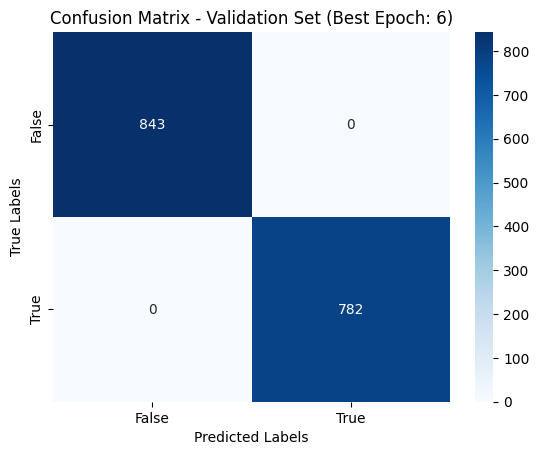

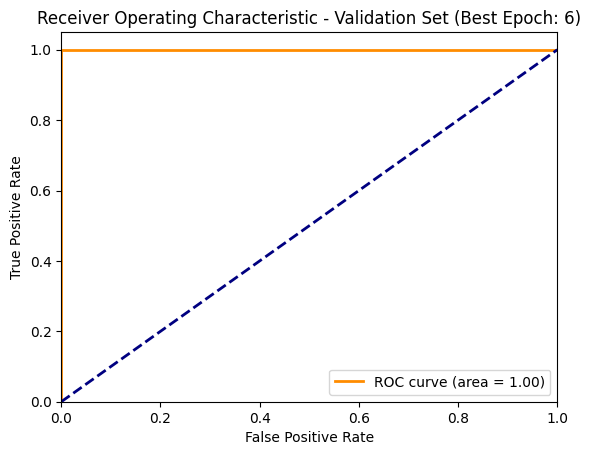

Testing Metrics: Accuracy: 1.0000, F1: 1.0000, Precision: 1.0000, Recall: 1.0000


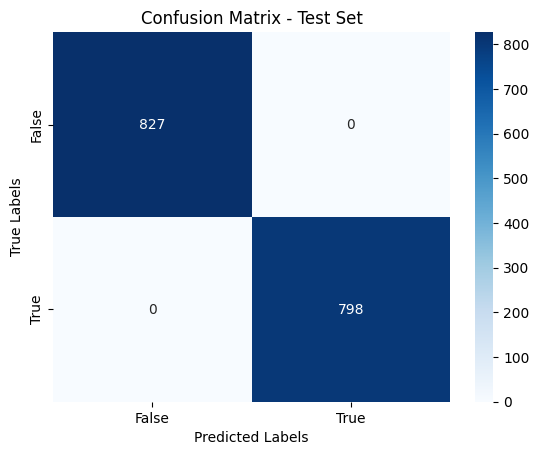

In [25]:
model = NeuralNetwork()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
train_acc, val_acc, trained_model = train_model(model, train_loader, val_loader, optimizer)
test_accuracy = test_model(trained_model, test_loader)

In [26]:
# Create DataLoaders
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Epoch 1, Loss: 1.9708, Train Acc: 0.6621, Val Loss: 0.4395, Val Acc: 0.8283
Train F1: 0.6397, Precision: 0.6541, Recall: 0.6259
Val F1: 0.8037, Precision: 0.8936, Recall: 0.7302
Epoch 2, Loss: 0.3107, Train Acc: 0.8853, Val Loss: 0.2762, Val Acc: 0.8978
Train F1: 0.8737, Precision: 0.9253, Recall: 0.8275
Val F1: 0.8852, Precision: 0.9639, Recall: 0.8184
Epoch 3, Loss: 0.2448, Train Acc: 0.9198, Val Loss: 0.2579, Val Acc: 0.9262
Train F1: 0.9135, Precision: 0.9451, Recall: 0.8840
Val F1: 0.9267, Precision: 0.8876, Recall: 0.9693
Epoch 4, Loss: 0.2101, Train Acc: 0.9319, Val Loss: 0.1721, Val Acc: 0.9563
Train F1: 0.9274, Precision: 0.9473, Recall: 0.9084
Val F1: 0.9543, Precision: 0.9599, Recall: 0.9488
Epoch 5, Loss: 0.1941, Train Acc: 0.9368, Val Loss: 0.2175, Val Acc: 0.9483
Train F1: 0.9328, Precision: 0.9507, Recall: 0.9157
Val F1: 0.9478, Precision: 0.9215, Recall: 0.9757
Epoch 6, Loss: 0.1803, Train Acc: 0.9407, Val Loss: 0.1927, Val Acc: 0.9415
Train F1: 0.9372, Precision: 0.952

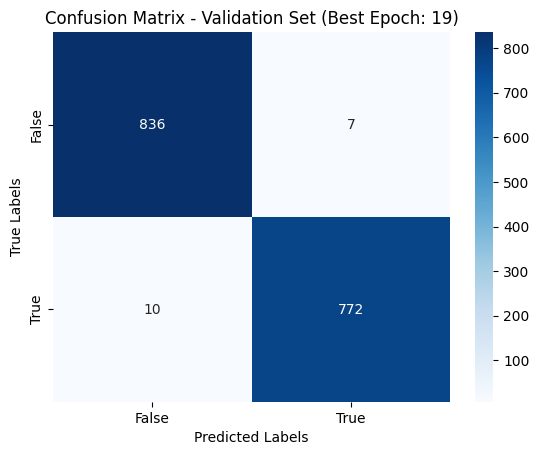

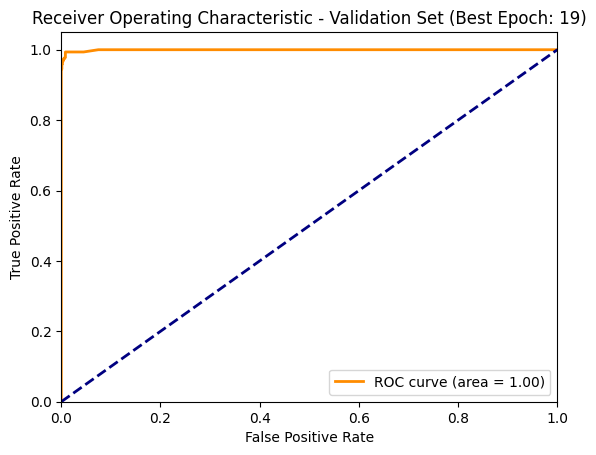

Testing Metrics: Accuracy: 0.9175, F1: 0.9093, Precision: 0.9882, Recall: 0.8421


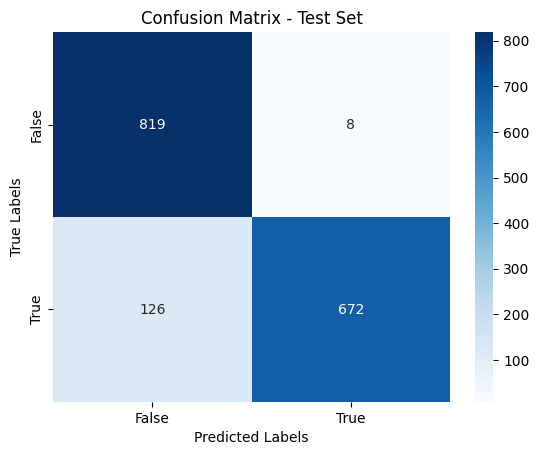

In [27]:
model = NeuralNetwork()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
train_acc, val_acc, trained_model = train_model(model, train_loader, val_loader, optimizer)
test_accuracy = test_model(trained_model, test_loader)

Epoch 1, Loss: 0.3233, Train Acc: 0.8677, Val Loss: 0.2404, Val Acc: 0.9243
Train F1: 0.8549, Precision: 0.9009, Recall: 0.8134
Val F1: 0.9246, Precision: 0.8881, Recall: 0.9642
Epoch 2, Loss: 0.1613, Train Acc: 0.9372, Val Loss: 0.1073, Val Acc: 0.9618
Train F1: 0.9336, Precision: 0.9471, Recall: 0.9204
Val F1: 0.9591, Precision: 0.9905, Recall: 0.9297
Epoch 3, Loss: 0.0738, Train Acc: 0.9774, Val Loss: 0.0408, Val Acc: 0.9902
Train F1: 0.9763, Precision: 0.9822, Recall: 0.9705
Val F1: 0.9899, Precision: 0.9799, Recall: 1.0000
Epoch 4, Loss: 0.0562, Train Acc: 0.9791, Val Loss: 0.0134, Val Acc: 0.9975
Train F1: 0.9781, Precision: 0.9790, Recall: 0.9773
Val F1: 0.9974, Precision: 1.0000, Recall: 0.9949
Epoch 5, Loss: 0.0143, Train Acc: 0.9955, Val Loss: 0.0080, Val Acc: 0.9988
Train F1: 0.9953, Precision: 0.9966, Recall: 0.9940
Val F1: 0.9987, Precision: 0.9974, Recall: 1.0000
Epoch 6, Loss: 0.0072, Train Acc: 0.9982, Val Loss: 0.0049, Val Acc: 0.9988
Train F1: 0.9981, Precision: 0.997

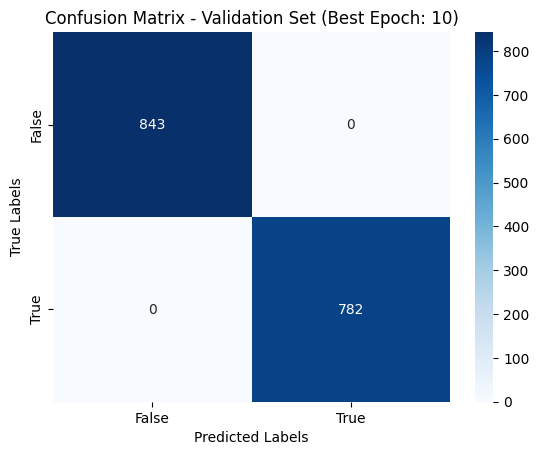

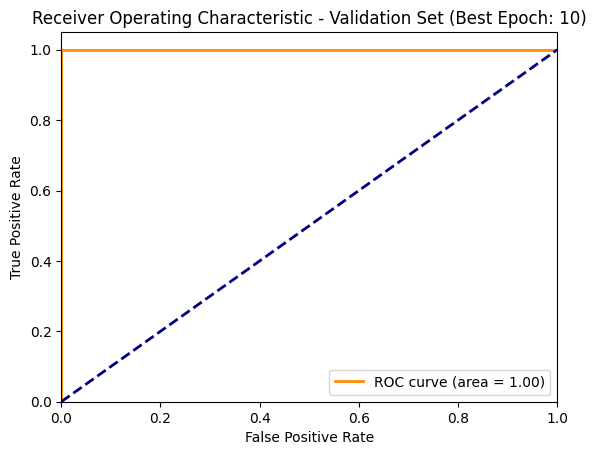

Testing Metrics: Accuracy: 1.0000, F1: 1.0000, Precision: 1.0000, Recall: 1.0000


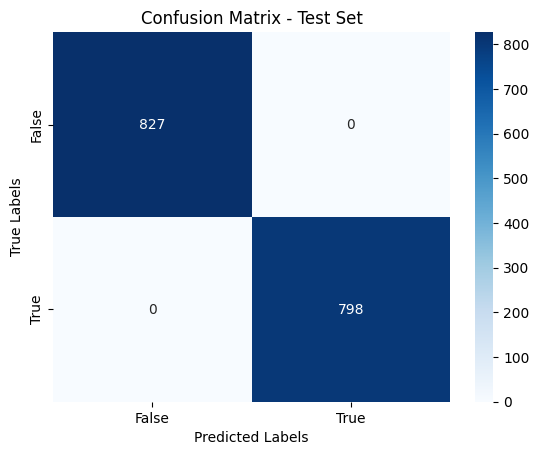

In [28]:
model = NeuralNetwork()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
train_acc, val_acc, trained_model = train_model(model, train_loader, val_loader, optimizer)
test_accuracy = test_model(trained_model, test_loader)

In [9]:
def train_plot(model, train_loader, val_loader, optimizer, epochs=20):
    criterion = torch.nn.BCEWithLogitsLoss()
    best_val_acc = 0
    best_epoch = 0
    best_val_labels = []
    best_val_preds = []
    best_val_probs = []

    # Lists for storing accuracies per epoch
    epoch_train_acc = []
    epoch_val_acc = []

    for epoch in range(epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        train_preds, train_labels = [], []
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            predicted = torch.sigmoid(outputs) > 0.5
            train_preds.extend(predicted.cpu().numpy())
            train_labels.extend(labels.cpu().numpy())

        # Calculate training metrics
        train_acc = accuracy_score(train_labels, train_preds)
        train_f1 = f1_score(train_labels, train_preds)
        train_precision = precision_score(train_labels, train_preds)
        train_recall = recall_score(train_labels, train_preds)
        epoch_train_acc.append(train_acc)  # Store training accuracy

        # Validation phase
        model.eval()
        val_preds, val_labels, val_probs = [], [], []
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs).squeeze()
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                probs = torch.sigmoid(outputs).cpu().numpy()
                predicted = probs > 0.5
                val_preds.extend(predicted)
                val_probs.extend(probs)
                val_labels.extend(labels.cpu().numpy())

        # Calculate validation metrics
        val_acc = accuracy_score(val_labels, val_preds)
        val_f1 = f1_score(val_labels, val_preds)
        val_precision = precision_score(val_labels, val_preds)
        val_recall = recall_score(val_labels, val_preds)
        epoch_val_acc.append(val_acc)  # Store validation accuracy

        # Update best validation accuracy, and save preds, labels, probs
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_epoch = epoch
            best_val_labels = val_labels
            best_val_preds = val_preds
            best_val_probs = val_probs

        # Print metrics
        print(f'Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss/len(val_loader):.4f}, Val Acc: {val_acc:.4f}')
        print(f'Train F1: {train_f1:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}')
        print(f'Val F1: {val_f1:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}')

    # Plot training and validation accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, epochs+1), epoch_train_acc, label='Training Accuracy')
    plt.plot(range(1, epochs+1), epoch_val_acc, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy vs. Epoch')
    plt.legend()
    plt.show()

    # After all epochs, plot for the best epoch if needed (confusion matrix and ROC curve)
    if best_epoch >= 0:
        # Plot confusion matrix
        cm = confusion_matrix(best_val_labels, best_val_preds)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
        plt.title(f'Confusion Matrix - Validation Set (Best Epoch: {best_epoch+1})')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.show()

        # Plot AUC-ROC curve
        fpr, tpr, _ = roc_curve(best_val_labels, best_val_probs)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic - Validation Set (Best Epoch: {best_epoch+1})')
        plt.legend(loc="lower right")
        plt.show()

    # Return the trained model and metrics
    return train_acc, best_val_acc, model


Epoch 1, Loss: 0.4050, Train Acc: 0.8078, Val Loss: 0.3484, Val Acc: 0.8425
Train F1: 0.7760, Precision: 0.8787, Recall: 0.6948
Val F1: 0.8534, Precision: 0.7728, Recall: 0.9527
Epoch 2, Loss: 0.2237, Train Acc: 0.9091, Val Loss: 0.1961, Val Acc: 0.9126
Train F1: 0.9028, Precision: 0.9262, Recall: 0.8806
Val F1: 0.9033, Precision: 0.9665, Recall: 0.8478
Epoch 3, Loss: 0.1526, Train Acc: 0.9393, Val Loss: 0.1596, Val Acc: 0.9409
Train F1: 0.9357, Precision: 0.9501, Recall: 0.9217
Val F1: 0.9417, Precision: 0.8970, Recall: 0.9910
Epoch 4, Loss: 0.1148, Train Acc: 0.9547, Val Loss: 0.1029, Val Acc: 0.9538
Train F1: 0.9527, Precision: 0.9517, Recall: 0.9538
Val F1: 0.9504, Precision: 0.9836, Recall: 0.9194
Epoch 5, Loss: 0.0628, Train Acc: 0.9727, Val Loss: 0.0539, Val Acc: 0.9729
Train F1: 0.9715, Precision: 0.9738, Recall: 0.9692
Val F1: 0.9725, Precision: 0.9511, Recall: 0.9949
Epoch 6, Loss: 0.0320, Train Acc: 0.9916, Val Loss: 0.0208, Val Acc: 0.9963
Train F1: 0.9912, Precision: 0.993

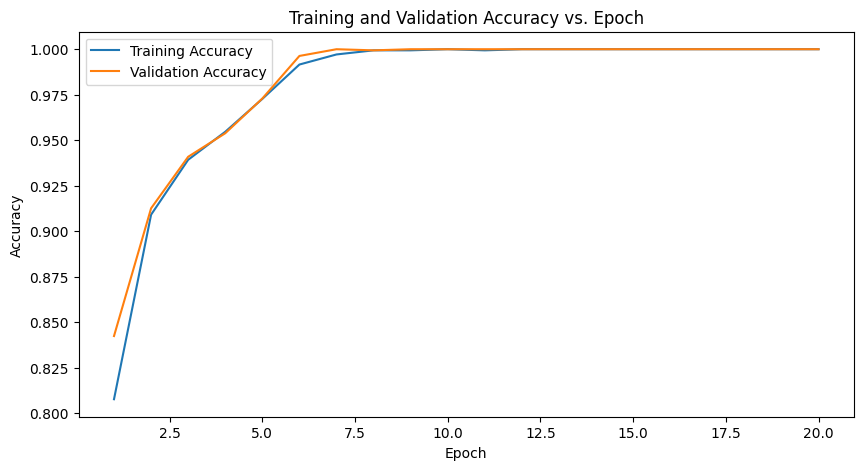

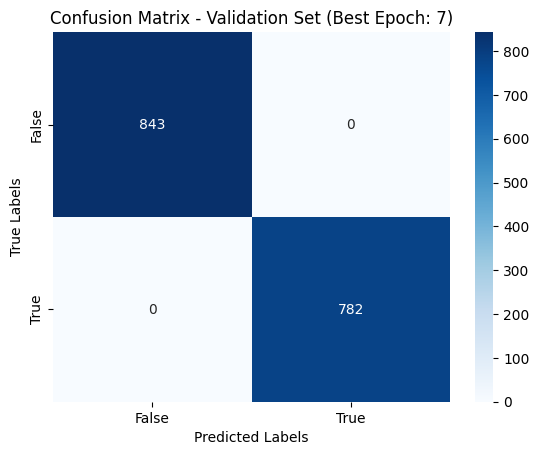

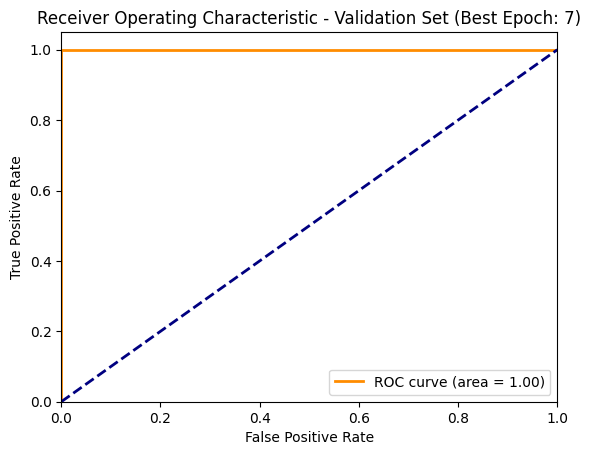

In [11]:
model = NeuralNetwork()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
train_acc, val_acc, trained_model = train_plot(model, train_loader, val_loader, optimizer)

Epoch 1, Loss: 0.3488, Train Acc: 0.8478, Val Loss: 0.1806, Val Acc: 0.9372
Train F1: 0.8303, Precision: 0.8915, Recall: 0.7770
Val F1: 0.9332, Precision: 0.9570, Recall: 0.9105
Epoch 2, Loss: 0.1457, Train Acc: 0.9469, Val Loss: 0.2122, Val Acc: 0.9188
Train F1: 0.9439, Precision: 0.9549, Recall: 0.9332
Val F1: 0.9078, Precision: 1.0000, Recall: 0.8312
Epoch 3, Loss: 0.0783, Train Acc: 0.9711, Val Loss: 0.0274, Val Acc: 0.9926
Train F1: 0.9695, Precision: 0.9803, Recall: 0.9589
Val F1: 0.9923, Precision: 0.9961, Recall: 0.9885
Epoch 4, Loss: 0.0228, Train Acc: 0.9930, Val Loss: 0.0225, Val Acc: 0.9926
Train F1: 0.9927, Precision: 0.9961, Recall: 0.9893
Val F1: 0.9923, Precision: 1.0000, Recall: 0.9847
Epoch 5, Loss: 0.0108, Train Acc: 0.9969, Val Loss: 0.0067, Val Acc: 1.0000
Train F1: 0.9968, Precision: 0.9983, Recall: 0.9953
Val F1: 1.0000, Precision: 1.0000, Recall: 1.0000
Epoch 6, Loss: 0.0051, Train Acc: 0.9994, Val Loss: 0.0036, Val Acc: 1.0000
Train F1: 0.9994, Precision: 1.000

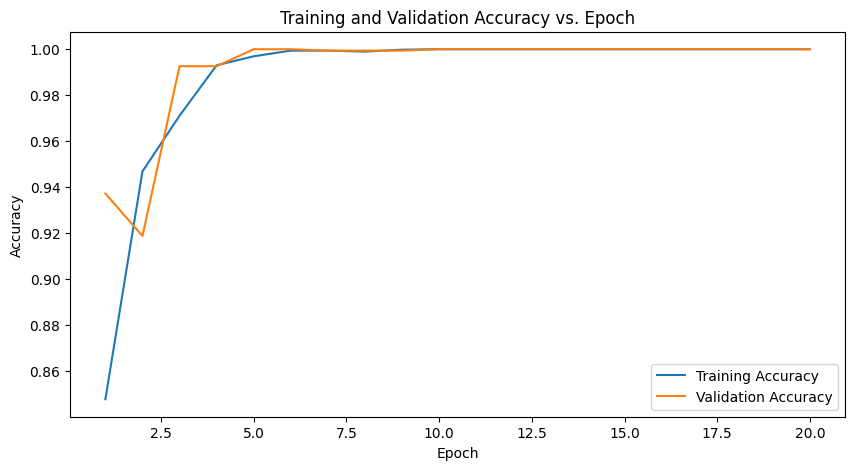

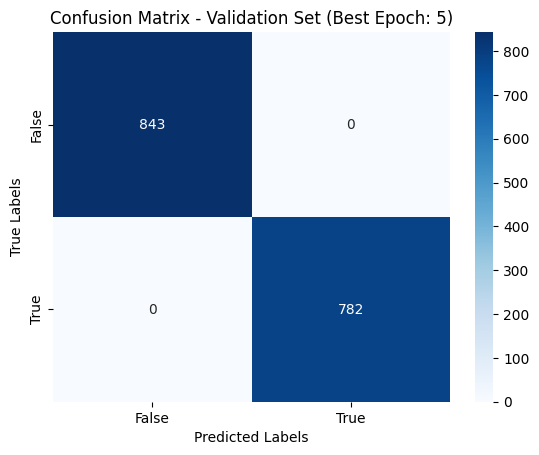

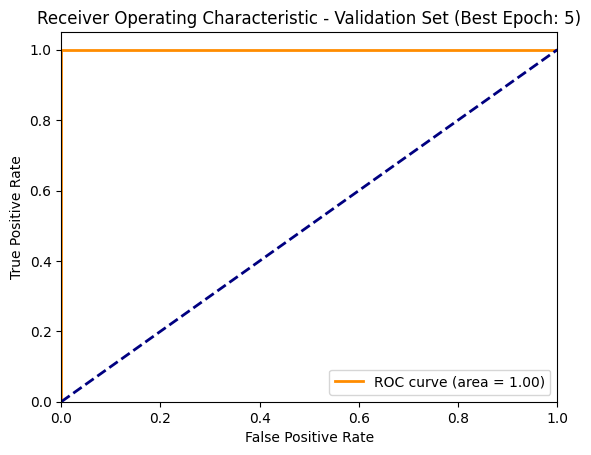

In [13]:
# Create DataLoaders
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model = NeuralNetwork()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
train_acc, val_acc, trained_model = train_plot(model, train_loader, val_loader, optimizer)